# Comparing models on different amounts of label noise

In [12]:
import pandas as pd

from blr.data import Dataset
from blr.model import LRModel, BLRModel

In [23]:
from blr import evaluation as blreval

In [2]:
%load_ext autoreload
%autoreload 2

## Getting the data

In [6]:
df = pd.read_csv('../data/spambase.data', header=None)
print(df.shape)
df.columns = [
    line[:-1]
    for line in open('../../spambase-cols.txt', 'r')
]
df.head()

(4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
X, y = df[[x for x in df.columns if x != 'spam']], df['spam']

## Preparing the experiment

In [27]:
noise_space = [0., 0.05, 0.1, 0.2, 0.3, 0.4]

y_tests = []
lr_preds = []
blr_preds = []
lr_models = []
blr_models = []

traces = []
tracesums = []

In [28]:
features = X.columns.values

In [45]:
UniformDataset = Dataset(X, y, noise_type='uniform')
PUDataset = Dataset(X, y, noise_type='pu')

In [46]:
for Xtr, Xts, ytr, yts in PUDataset.generate_splits_from_parameters(noise_space):
    print("Generating uniform-noise splits..")
    
    print("Running base linear regression..")
    model = LRModel(features)
    model.fit(Xtr, ytr)
    y_pred = model.predict_proba(Xts)
    
    y_tests.append(yts)
    lr_preds.append(y_pred)
    lr_models.append(model)
    
    print("Running Bayesian linear regression..")
    model = BLRModel(Xtr, ytr, features)
    _ = model.fit()
    
    traces.append(model.trace)
    tracesums.append(model.get_trace_summary())

    y_pred = model.predict_proba(Xts)
    
    blr_preds.append(y_pred)
    blr_models.append(model)

Generating uniform-noise splits..
Running base linear regression..
Running Bayesian linear regression..


/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lr_weights]


Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 103 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Generating uniform-noise splits..█████████| 100.00% [100/100 00:01<00:00]
Running base linear regression..


/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running Bayesian linear regression..


/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lr_weights]


Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 111 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Generating uniform-noise splits..█████████| 100.00% [100/100 00:01<00:00]
Running base linear regression..
Running Bayesian linear regression..


/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multipro

Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 128 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Generating uniform-noise splits..█████████| 100.00% [100/100 00:01<00:00]
Running base linear regression..
Running Bayesian linear regression..


/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multipro

Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 119 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Generating uniform-noise splits..█████████| 100.00% [100/100 00:01<00:00]
Running base linear regression..
Running Bayesian linear regression..


/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multipro

Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 148 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Generating uniform-noise splits..█████████| 100.00% [100/100 00:01<00:00]
Running base linear regression..
Running Bayesian linear regression..


/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multipro

Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 128 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


/home/franciszacdlc/.pyenv/versions/3.9.14/envs/base3.9/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [47]:
for t in tracesums:
    t.index = features

In [53]:
len(tracesums[6:])

6

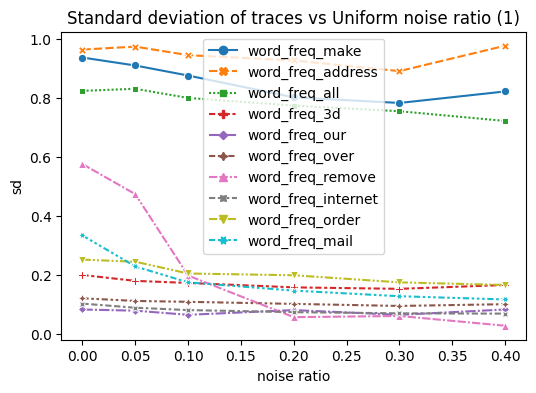

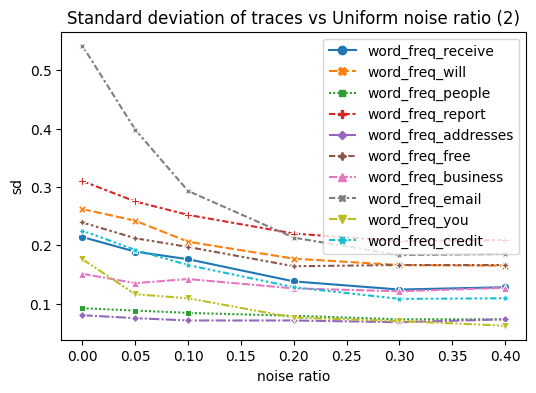

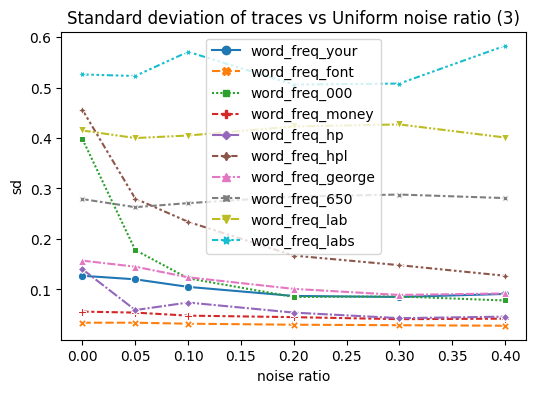

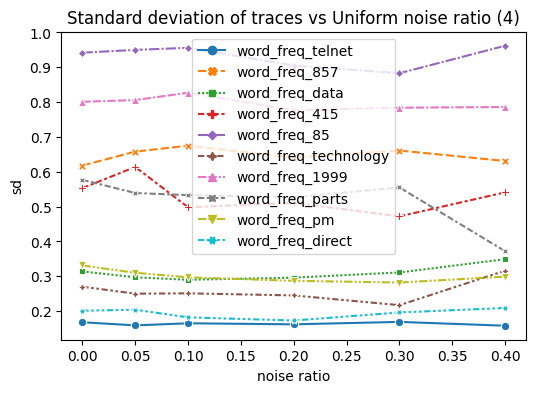

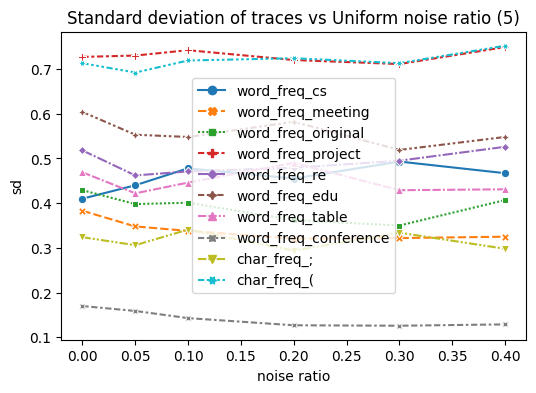

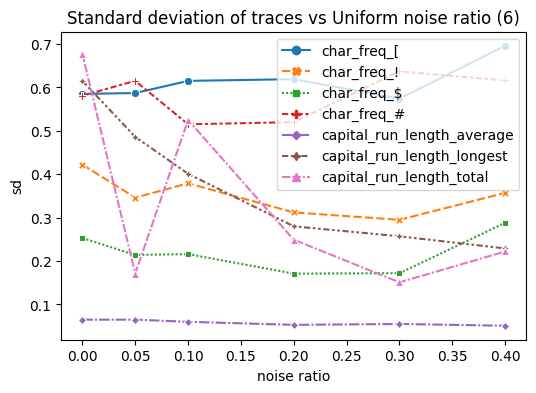

In [56]:
for i in range(6):
    title = f'Standard deviation of traces vs Uniform noise ratio ({i+1})'
    feats = features[i*10 : min(i*10+10,len(features))]
    fig, ax = blreval.generate_tracesum_plot(feats, noise_space, tracesums[6:], title)
    fig.savefig(f'std_pu_noise_{i+1}.png')

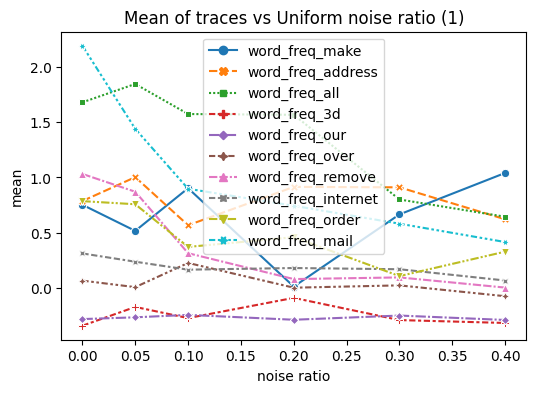

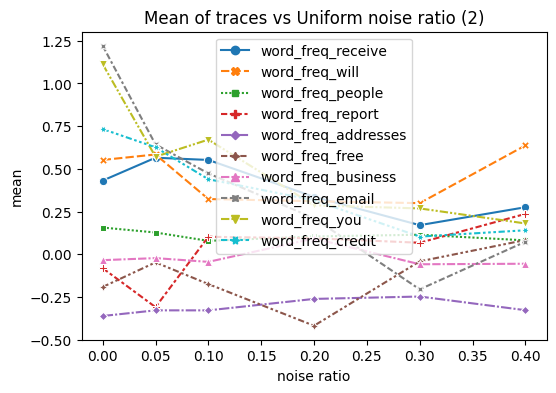

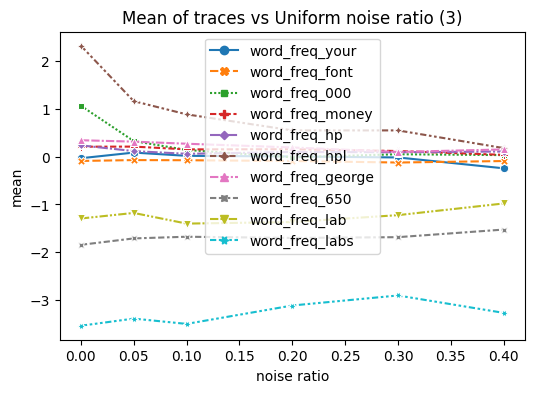

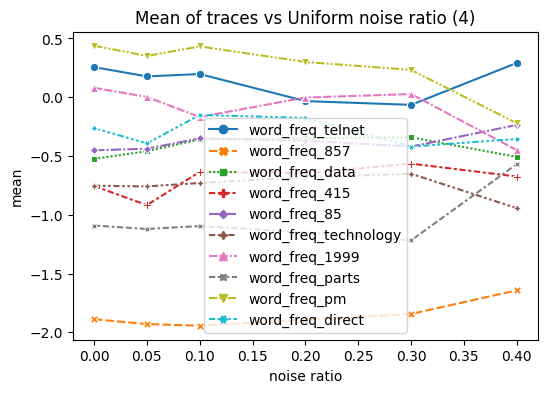

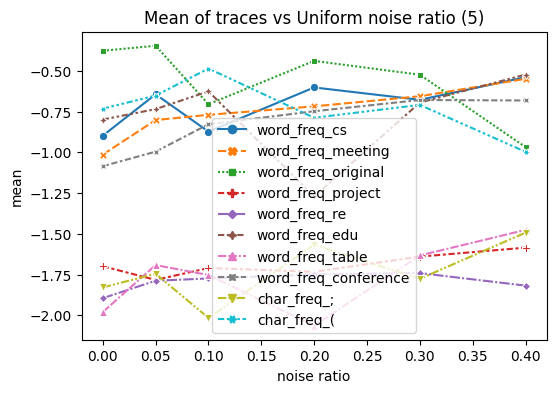

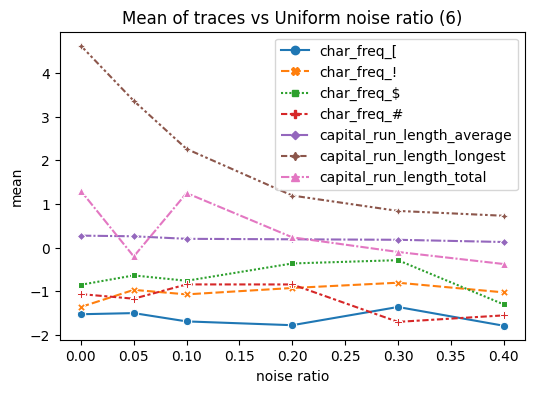

In [57]:
for i in range(6):
    title = f'Mean of traces vs Uniform noise ratio ({i+1})'
    feats = features[i*10 : min(i*10+10,len(features))]
    fig, ax = blreval.generate_tracesum_plot(feats, noise_space, tracesums[6:], title, v='mean')
    fig.savefig(f'mean_pu_noise_{i+1}.png')

In [60]:
len(blr_preds)

12

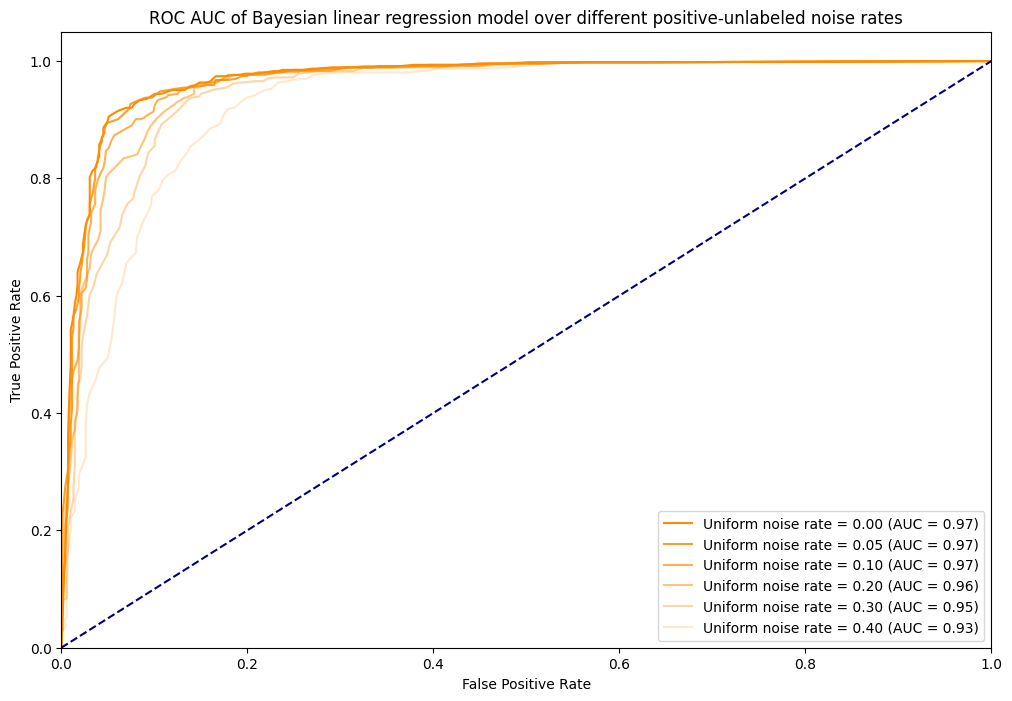

In [61]:
fig, ax = blreval.generate_multiple_roc(
    y_tests[6:],
    blr_preds[6:],
    [{
        'alpha': 1-(0.16 * i),
        'color': 'darkorange',
        'label': "Uniform noise rate = %.2f (AUC = {:.2f})" % noise_space[i]
    } for i in range(6)],
    'ROC AUC of Bayesian linear regression model over different positive-unlabeled noise rates'
)
fig.savefig('roc_auc_blr_pu.png')

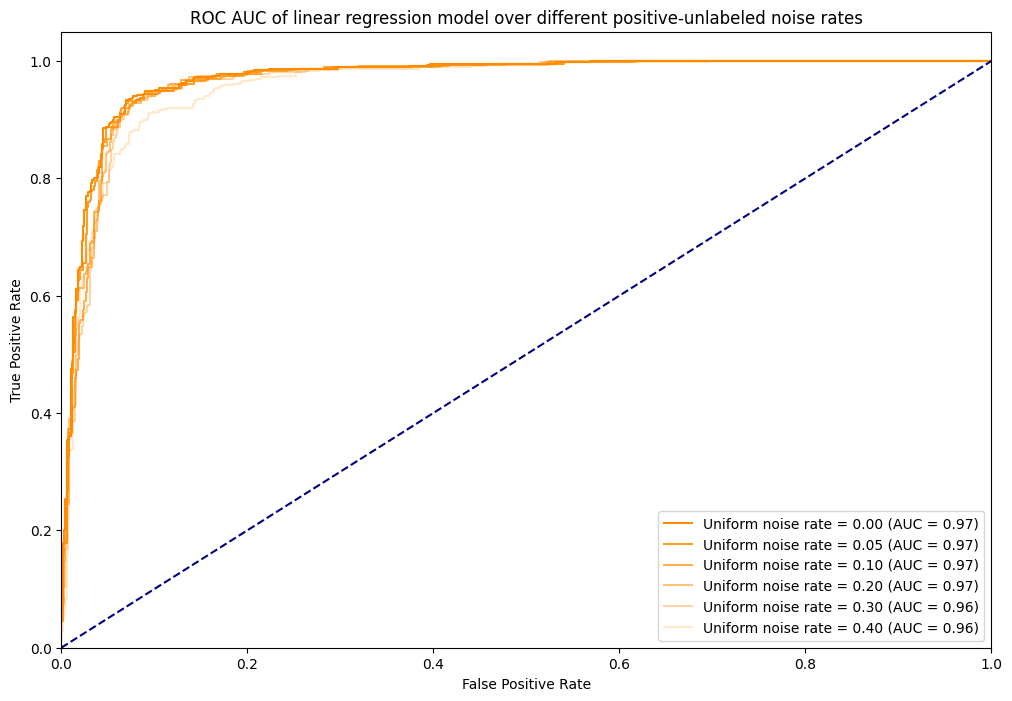

In [63]:
fig, ax = blreval.generate_multiple_roc(
    y_tests[6:],
    lr_preds[6:],
    [{
        'alpha': 1-(0.16 * i),
        'color': 'darkorange',
        'label': "Uniform noise rate = %.2f (AUC = {:.2f})" % noise_space[i]
    } for i in range(6)],
    'ROC AUC of linear regression model over different positive-unlabeled noise rates'
)
fig.savefig('roc_auc_lr_pu.png')